<a href="https://colab.research.google.com/github/wonyoung-ji/statistics/blob/master/study/200927_8%EC%9E%A5_%EB%B2%94%EC%A3%BC%ED%98%95%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# __범주형 데이터 분석__

- 카이제곱 검정: 카이제곱 분포에 기초한 통계적 분석 방법. 관측된 빈도가 기대되는 빈도와 통계적으로 유의미하게 다른지 검정하는 방법
- 적합도 검정, 독립성 검정, 동질성 검정이 존재

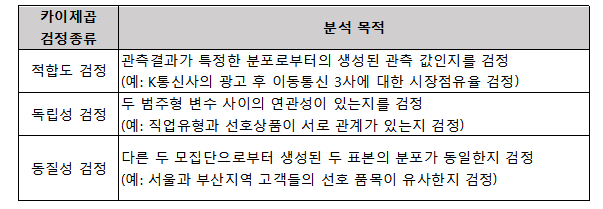


# 1.적합도 검정

## 1.1. 개념 및 주요 이론
- 적합도 검정: 귀무가설에서 제시한 각 범주의 비율이 실제 자료에 적합한지 검정
- 데이터가 여러 개의 범주에 대한 관측도수 형태로 주어지는 문제를 다룰 때 사용
- 알려진 모집단의 분포를 통해 예상되는 기대도수와 실제 표본을 통해 실제로 얻어진 관측도수 사이에 어느 정도 차이가 있는지 검정
- ex) S 기업의 매장 별 판매비율이 A매장-30%, B매장-40%, C매장-50%일 때 올해에도 3개 점포의 판매비율이 동일한지 판단할 때

## 1.2.적합도 검정 과정

### 1.2.1. 빈도교차표 작성
- 카이제곱 통계량 사용. 빈도교차표에 의한 비율검정을 기반으로 함
- 일반적인 도수분포표와 동일
- A는 범주형 변수, 관측도수 n은 각 범주마다 측정된 도수(빈도)를 의미

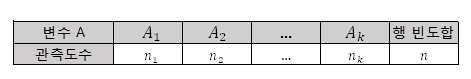

### 1.2.2.기대도수 산출
- 빈도교차표를 바탕으로 각 셀의 기대도수를 계산
- 기대도수: 모집단의 각 범주 별 비율을 p1,p2..pk라고고 했을 때 관측도수 n과 곱하여 npk값으로 산출

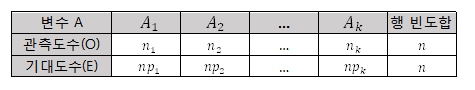

### 1.2.3. 카이제곱 통계량 산출
- 범주별 카이제곱 통계량: 각 셀의 관측도수와 기대도수 간 차이의 제곱 값을 해당 셀의 기대도수로 나눈 값
- 전체 카이제곱 통계량: 이러한 각 셀의 카이제곱 값의 모든 합

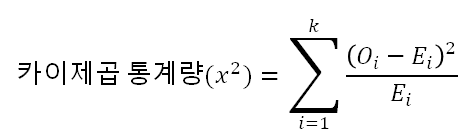

- 카이제곱 통계량의 자유도 = (범주의 수 - 1)
- 관측도수(O)와 기대도수(E)의 차이가 크지 않으면 카이제곱 통계량은 작게 산출
- 이는 귀무가설에서 제시한 각 범주의 비율과 실제 자료에 나타난 범주의 비율이 크게 다르지 않음을 의미
- 반대로, O와 E의 차이가 크면, 귀무가설에서 제시한 각 범주의 비율은 실제 자료와는 적합하지 않음을 의미

## 1.3. 분석 및 해석
- 쇼핑몰 클레임고객들의 구매패턴을 파악하고자 클레임고객들의 구매유형별 비율의 적합도 검정 시행
- 기존에 알려진 구매형 비율을 이용

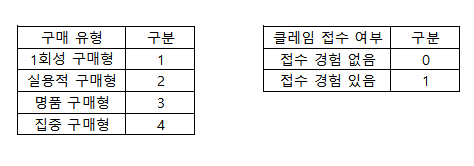

- 귀무가설 = 클레임접수고객의 구매유형별 비율은 1회성구매형-10%, 실용적구매형-30%, 명품구매형-20%, 집중구매형-40% 이다
- 연구가설 = 클레임접수고객의 구매유형별 비율은 1회성구매형-10%, 실용적구매형-30%, 명품구매형-20%, 집중구매형-40% 이 아니다


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_csv('/content/gdrive/My Drive/통계/Ashopping.csv',sep=',',encoding='CP949')
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


In [4]:
# 빈도교차표 작성
X = pd.crosstab(df.클레임접수여부, df.구매유형, margins=True)
X

구매유형,1,2,3,4,All
클레임접수여부,,,,,
0,24,197,57,263,541
1,19,120,87,233,459
All,43,317,144,496,1000


- 클레임접수여부, 구매유형 두 범주형 변수간의 빈도를 파악하기 위해 crosstab 함수 사용
- margins: 행 합계와 열 합계를 추가 여부

In [5]:
# 관측도수, 기대도수 출력
Ob = X.values[1,:4]
Pr = np.array([0.1,0.3,0.2,0.4])
n = X.values[1,4]
E = n*Pr

In [6]:
# 카이제곱 적합도 검정
stats.chisquare(Ob,E)

Power_divergenceResult(statistic=31.582788671023955, pvalue=6.407672361002909e-07)

- 카이제곱 통계량 31.58, p-value 0.01 이하
- p-value < 0.01 이므로 귀무가설 기각 및 연구가설 채택
- 즉, 구매유형별 클레임접수 여부는 1회성구매형-10%, 실용적구매형-30%, 명품구매형-20%, 집중구매형-40% 라는 과거의 분포를 따르지 않음
- 예상과는 달리, 1회성구매형 구매자들의 클레임 비율은 높지 않고, 집중구매형의 경우 50%가 넘음
- 그러므로 쇼핑몰은 집중구매형 고객들의 고객만족도를 높이는 방법 모색해야 함

# 2.독립성 검정


## 2.1.개념 및 주요 이론
- 독립성검정: 두 개의 범주형 변수간에 서로 연관성이 있는지, 독립적인지 카이제곱 검정을 통해 통계적으로 판단
- ex) 학력(범주형변수)과 고객의 등급(범주형변수) 간 연관성 유무 판단

## 2.2.독립성 검정 과정

### 2.2.1. 두 가지 명목변수 빈도교차표 작성

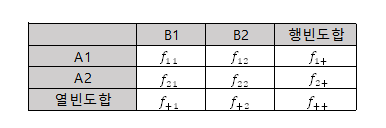

- f11 = A1과 B1에 해당하는 관측치 수
- f1+ = f11 + f12, f+1 = f11 + f21, f++ = f11 + f12 + f21 + f22

### 2.2.2기대도수 빈도교차표 작성

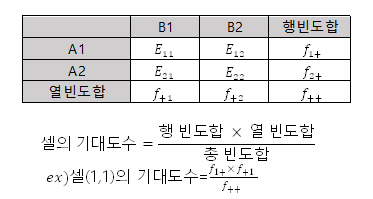

### 2.2.3. 카이제곱 통계량 산출
- 카이제곱 통계량 = 각 셀에 대한 관측도수와 기대도수 차이의 제곱 값을 해당 셀의 기대도수로 나눈 것
- 전체 카이제곱 통계량 = 각 셀의 카이제곱 값의 모든 합

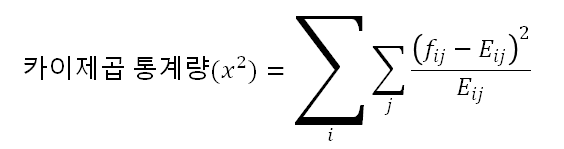

- 카이제곱 통계량의 자유도 = (행의 수 - 1) X (열의 수 - 1)
- 두 명목변수 간에 연관성이 존재하지 않는다면 관측도수와 기대도수 값은 유사하게 나타나므로 전체 카이제곱 통계량의 값은 매우 작음
- 반대로, 연관성이 존재한다면 관측도수와 기대도수는 큰 차이를 보이게 되므로 전체 카이제곱 통계량 값은 매우 큼

## 2.3. 분석 및 해석
- 쇼핑몰은 클레임을 제기하는 고객은 성별과 무관하지 않을 것 같다는 전제로 독립성 검정 수행

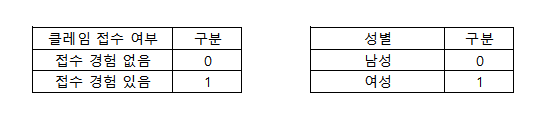

- 귀무가설 = 클레임 접수 여부와 성별은 연관성이 없다
- 연구가설 = 클레임 접수 여부와 성별은 연관성이 있다

In [7]:
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


In [8]:
# 빈도교차표 작성
X = pd.crosstab(df.성별, df.클레임접수여부, margins = True)
X

클레임접수여부,0,1,All
성별,,,
0,139,10,149
1,402,449,851
All,541,459,1000


In [9]:
# 카이제곱 독립성 검정
stats.chi2_contingency(X)

(108.28443800224257,
 1.6897298981327603e-22,
 4,
 array([[  80.609,   68.391,  149.   ],
        [ 460.391,  390.609,  851.   ],
        [ 541.   ,  459.   , 1000.   ]]))

- 카이제곱 통계량 106.48, p-value 0.01 이하, 자유도=1, 각 셀의 기대도수
- p-value < 0.01 이므로 귀무가설 기각 및 연구가설 채택
- 즉, 성별과 클레임접수여부는 연관성이 있음
- 성별에 따라 다른 방식의 고객서비스를 제공하는 게 적합

# 3.동질성 검정

## 3.1.개념 및 주요 이론
- 동질성 검정: 서로 다른 모집단에서 독립적으로 추출한 표본들의 범주별 비율이 서로 동질적인것인지 검정하는 분석 방법
- 앞서 다룬 독립성 검정은 기술적 방법은 동일하지만, 사용목적에 다라 자료의 추출 방법이나 문제의 접근방식, 해석이 달라짐
- 독립성 검정 = 하나의 표본에서 두 범주형 변수 A, B의 독립성 검정
- 동질성 검정 = 서로 다른 독립적인 표본에서 공통된 하나의 범주형 변수의 비율이 동질적인지 검정

## 3.2. 분석 및 해석
- 쇼핑몰은 구매유형 4가지 비율이 청년층 그룹 or 중장년층 그룹에 따라 동질적인지 검토하여 연령대별 마케팅 전략

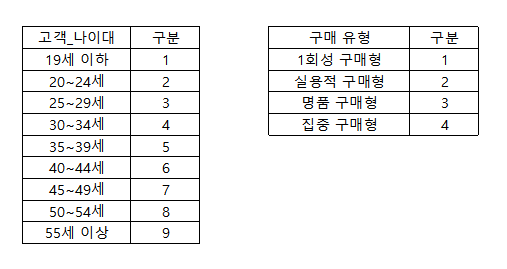


- 39세 이하 = 청년층
- 40세 이상 = 중장년층
- 귀무가설 = 청년층과 중장년층의 구매 유형 비율은 동일하다
- 연구가설 = 청년층과 중장년층의 구매 유형 비율은 동일하지 않다

In [10]:
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


In [11]:
df['고객연령대'] = ''
df.고객연령대[df.고객_나이대 == 1] = '1'
df.고객연령대[df.고객_나이대 == 2] = '1'
df.고객연령대[df.고객_나이대 == 3] = '1'
df.고객연령대[df.고객_나이대 == 4] = '1'
df.고객연령대[df.고객_나이대 == 5] = '1'
df.고객연령대[df.고객_나이대 == 6] = '2'
df.고객연령대[df.고객_나이대 == 7] = '2'
df.고객연령대[df.고객_나이대 == 8] = '2'
df.고객연령대[df.고객_나이대 == 9] = '2'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [12]:
# 두 모집단 랜덤표본 추출
df1=df.loc[df.고객연령대=='1']
df2=df.loc[df.고객연령대=='2']
df1_sample = df1.sample(200,random_state = 29)
df2_sample = df2.sample(200,random_state = 29)
df3= df1_sample.append(df2_sample)
df3.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,고객연령대
183,184,0,3569550,21,169979,16,364900,1,4,1,5,5,1,3,1019,0,7,7,7,4,3,7,7,7,5,6,6,5.0,6.0,5,5,5,6,5,5,6,6,5,6,1
162,163,0,4796170,57,84143,23,379400,1,2,1,5,5,1,5,1086,0,6,7,7,5,4,7,7,7,6,7,6,6.0,6.0,6,7,6,6,7,5,5,6,6,6,1
357,358,0,8898290,12,741524,24,360445,1,3,1,5,5,1,5,1039,0,6,6,7,3,6,4,6,6,5,5,6,5.0,5.0,6,5,5,5,5,4,4,4,5,5,1
115,116,0,4160240,24,173343,12,302250,1,2,0,5,5,1,2,1035,0,2,6,7,4,4,4,4,4,6,5,5,5.0,6.0,5,5,6,5,6,5,5,6,6,6,1
30,31,0,11879990,42,282857,12,214435,1,2,0,5,5,1,4,1070,0,7,6,7,5,6,7,7,7,6,5,6,5.0,6.0,5,5,6,6,5,6,5,6,6,5,1


In [13]:
# 빈도교차표 생성
X = pd.crosstab(df3.고객연령대, df3.구매유형, margins=False)
X

구매유형,1,2,3,4
고객연령대,,,,
1,10,67,18,105
2,8,65,38,89


In [14]:
# 카이제곱 동질성 검정
stats.chi2_contingency(X)

(8.714970024248375, 0.033330661685866646, 3, array([[ 9., 66., 28., 97.],
        [ 9., 66., 28., 97.]]))

- 카이제곱 통계량 8.71, p-value 0.03
- p-value < 0.05 (유의수준 95% 수준) 이므로 귀무가설 기각 및 연구가설 채택
- 즉, 쇼핑몰 고객들의 청년층과 중장년층의 구매유형 분포는 동질적이지 않음
- 청년층의 경우, 실속 구매형과 집중 구매형의 비중이 높음
- 중장년층의 경우 청년층보다 구매유형 별 비율편차가 크지 않지만 명품구매형 비중이 상대적으로 높음
- 이를 고려한 마케팅 전략 필요